# Process selected labeled data and create DFs

In [8]:
import os

import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format='retina'

import math
from collections import defaultdict
from textwrap import wrap
import numpy as np

import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

import nltk.data
from nltk.tokenize import sent_tokenize
from nltk.corpus import alpino

sent_detector = nltk.data.load('tokenizers/punkt/dutch.pickle')

In [9]:
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 8
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [1]:
DATA_DIR = "/home/leonardovida/dev/hist-aware/notebooks/data/labeled-full/split_labeled/merged"
SAVE_DIR = "/home/leonardovida/dev/hist-aware/notebooks/data/labeled-full/split_labeled/merged_split"
PRE_TRAINED_MODEL_NAME = 'wietsedv/bert-base-dutch-cased'

## Load csv

In [13]:
list_cols = ['sentiment', 'text', 'energy', 'article_filepath', 'article_name', 'count', 'date', 'dir', 'index_article', 'index_metadata', 'metadata_filepath',
                    'newspaper_publisher', 'newspaper_title', 'newspaper_volume', 
             'newspaper_issuenumber', 'text_clean', 'type']
list_cols_1960 = ['sentiment', 'text', 'energy', 'article_filepath', 'article_name', 'count', 'date', 'dir_x', 'index_article', 'index_metadata', 'metadata_filepath',
                    'newspaper_publisher', 'newspaper_title', 'newspaper_volume', 
             'newspaper_issuenumber', 'text_clean', 'subject']

In [17]:
def clean_individual_df(df):
    """Function to clean df after concat"""
    df.text.replace('', np.nan, inplace=True)
    df.dropna(subset=['text'], inplace=True)
    df.rename(columns = {"sentiment": "labels"}, inplace=True)
    df.labels.replace('', np.nan, inplace=True)
    df.dropna(subset=['labels'], inplace=True)

    df = df[df.energy == "Y"]
    df = df[df.labels != None]
    
    # Substitute categorical to numerical labels
    cleanup_sentiment = {"labels": {"VN": 1, "NG": 2, "NE": 3, "PO": 4, "VP": 5}}
    df = df.replace(cleanup_sentiment)
    
    # Squeeze from 5 to 3 labels
    def to_sentiment(rating):
        rating = int(rating)
        if rating <= 2:
            return 0  # NEGATIVE
        elif rating == 3: 
            return 1 # NEUTRAL
        else:
            return 2 # POSITIVE

    df['labels'] = df.labels.apply(to_sentiment)
    return df

def clean_df(df):
    """Function to clean df after concat"""
    df.text.replace('', np.nan, inplace=True)
    df.dropna(subset=['text'], inplace=True)
    df.labels.replace('', np.nan, inplace=True)
    df.dropna(subset=['labels'], inplace=True)
    return df

### Gas

In [18]:
# Load split labeled files
gas_1960_marin = pd.read_csv(os.path.join(DATA_DIR, "marin_1960s_gas.csv"))
gas_1970 = pd.read_csv(os.path.join(DATA_DIR, "edo_1970s_gas.csv"))
gas_1970_marin = pd.read_csv(os.path.join(DATA_DIR, "marin_1970s_gas.csv"))
gas_1980 = pd.read_csv(os.path.join(DATA_DIR, "edo_1980s_gas.csv"))
gas_1980_marin = pd.read_csv(os.path.join(DATA_DIR, "marin_1980s_gas.csv"))
gas_1990 = pd.read_csv(os.path.join(DATA_DIR, "edo_1990s_gas.csv"))
gas_1990_marin = pd.read_csv(os.path.join(DATA_DIR, "marin_1990s_gas.csv"))

# Clean columns
gas_1960_marin = gas_1960_marin[list_cols_1960]
gas_1960_marin.rename(columns = {"dir_x": "dir", "subject": "type"}, inplace = True)
gas_1970 = gas_1970[list_cols]
gas_1970 = clean_individual_df(gas_1970)
gas_1970_marin = gas_1970_marin[list_cols]
gas_1970_marin = clean_individual_df(gas_1970_marin)
gas_1980 = gas_1980[list_cols]
gas_1980 = clean_individual_df(gas_1980)
gas_1980_marin = gas_1980_marin[list_cols]
gas_1980_marin = clean_individual_df(gas_1980_marin)
gas_1990 = gas_1990[list_cols]
gas_1990 = clean_individual_df(gas_1990)
gas_1990_marin = gas_1990_marin[list_cols]
gas_1990_marin = clean_individual_df(gas_1990_marin)

# Save back to cleaned csv
gas_1960_marin.to_csv(os.path.join(DATA_DIR, "marin_1960s_gas_cleaned.csv"))
gas_1970.to_csv(os.path.join(DATA_DIR, "edo_1970s_gas_cleaned.csv"))
gas_1970_marin.to_csv(os.path.join(DATA_DIR, "marin_1970s_gas_cleaned.csv"))
gas_1980.to_csv(os.path.join(DATA_DIR, "edo_1980s_gas_cleaned.csv"))
gas_1980_marin.to_csv(os.path.join(DATA_DIR, "marin_1980s_gas_cleaned.csv"))
gas_1990.to_csv(os.path.join(DATA_DIR, "edo_1990s_gas_cleaned.csv"))
gas_1990_marin.to_csv(os.path.join(DATA_DIR, "marin_1990s_gas_cleaned.csv"))

# Create complete gas df
gas = pd.concat([gas_1960_marin, gas_1970, gas_1970_marin, gas_1980, gas_1980_marin,
                gas_1990, gas_1990_marin], ignore_index=True)
#gas = gas_1960.append(gas_1970, ignore_index=True)
#gas = gas.append(gas_1980, ignore_index=True)
#gas = gas.append(gas_1990, ignore_index=True)
gas = gas[gas.energy == "Y"]
gas = gas[gas.labels != None]
gas = clean_df(gas)

In [21]:
#Check
print(gas_1990.head(1))
print(len(gas))

   labels                                               text energy  \
0       0  De uitworp van zwaveldioxide (SO2) door het ve...      Y   

                                    article_filepath  \
0  /Users/leonardovida/dev/HistAware/data/raw/del...   

                         article_name  count        date  \
0  DDD_010645647_0550_articletext.xml      1  1990-03-09   

                                                 dir  index_article  \
0  /Users/leonardovida/dev/HistAware/data/raw/del...        2411001   

   index_metadata                                  metadata_filepath  \
0          6150.0  /Users/leonardovida/dev/HistAware/data/raw/del...   

    newspaper_publisher newspaper_title  newspaper_volume  \
0  Dagblad De Telegraaf    De Telegraaf              98.0   

   newspaper_issuenumber                                         text_clean  \
0                31769.0  de van zwaveldioxide door het verstoken van fo...   

  type  
0    p  
2091


### Oil

In [26]:
# Load split labeled files
oil_1960_marin = pd.read_csv(os.path.join(DATA_DIR, "marin_1960s_oil.csv"))
oil_1970 = pd.read_csv(os.path.join(DATA_DIR, "edo_1970s_oil.csv"))
oil_1970_marin = pd.read_csv(os.path.join(DATA_DIR, "marin_1970s_oil.csv"))
oil_1980 = pd.read_csv(os.path.join(DATA_DIR, "edo_1980s_oil.csv"))
oil_1980_marin = pd.read_csv(os.path.join(DATA_DIR, "marin_1980s_oil.csv"))
oil_1990 = pd.read_csv(os.path.join(DATA_DIR, "edo_1990s_oil.csv"))
oil_1990_marin = pd.read_csv(os.path.join(DATA_DIR, "marin_1990s_oil.csv"))

# Clean columns
oil_1960_marin = oil_1960_marin[list_cols_1960]
oil_1960_marin.rename(columns = {"dir_x": "dir", "subject": "type"}, inplace = True)
oil_1970 = oil_1970[list_cols]
oil_1970 = clean_individual_df(oil_1970)
oil_1970_marin = oil_1970_marin[list_cols]
oil_1970_marin = clean_individual_df(oil_1970_marin)
oil_1980 = oil_1980[list_cols]
oil_1980 = clean_individual_df(oil_1980)
oil_1980_marin = oil_1980_marin[list_cols]
oil_1980_marin = clean_individual_df(oil_1980_marin)
oil_1990 = oil_1990[list_cols]
oil_1990 = clean_individual_df(oil_1990)
oil_1990_marin = oil_1990_marin[list_cols]
oil_1990_marin = clean_individual_df(oil_1990_marin)

# Save back to cleaned csv
oil_1960_marin.to_csv(os.path.join(DATA_DIR, "marin_1960s_oil_cleaned.csv"))
oil_1970.to_csv(os.path.join(DATA_DIR, "edo_1970s_oil_cleaned.csv"))
oil_1970_marin.to_csv(os.path.join(DATA_DIR, "marin_1970s_oil_cleaned.csv"))
oil_1980.to_csv(os.path.join(DATA_DIR, "edo_1980s_oil_cleaned.csv"))
oil_1980_marin.to_csv(os.path.join(DATA_DIR, "marin_1980s_oil_cleaned.csv"))
oil_1990.to_csv(os.path.join(DATA_DIR, "edo_1990s_oil_cleaned.csv"))
oil_1990_marin.to_csv(os.path.join(DATA_DIR, "marin_1990s_oil_cleaned.csv"))

# Create complete oil df
oil = pd.concat([oil_1960_marin, oil_1970, oil_1970_marin, oil_1980, oil_1980_marin,
                oil_1990, oil_1990_marin], ignore_index=True)
#oil = oil_1960.append(oil_1970, ignore_index=True)
#oil = oil.append(oil_1980, ignore_index=True)
#oil = oil.append(oil_1990, ignore_index=True)
oil = oil[oil.energy == "Y"]
oil = oil[oil.labels != None]
oil = clean_df(oil)

In [27]:
print(oil_1990.head(1))
print(len(oil))

   labels                                               text energy  \
0       0  De uitworp van zwaveldioxide (SO2) door het ve...      Y   

                                    article_filepath  \
0  /Users/leonardovida/dev/HistAware/data/raw/del...   

                         article_name  count        date  \
0  DDD_010645647_0550_articletext.xml      1  1990-03-09   

                                                 dir  index_article  \
0  /Users/leonardovida/dev/HistAware/data/raw/del...        2411001   

   index_metadata                                  metadata_filepath  \
0          6150.0  /Users/leonardovida/dev/HistAware/data/raw/del...   

    newspaper_publisher newspaper_title  newspaper_volume  \
0  Dagblad De Telegraaf    De Telegraaf              98.0   

   newspaper_issuenumber                                         text_clean  \
0                31769.0  de van zwaveldioxide door het verstoken van fo...   

  type  
0    p  
2288


### Coal

In [29]:
# Load split labeled files
coal_1960_marin = pd.read_csv(os.path.join(DATA_DIR, "marin_1960s_coal.csv"))
coal_1970 = pd.read_csv(os.path.join(DATA_DIR, "edo_1970s_coal.csv"))
coal_1970_marin = pd.read_csv(os.path.join(DATA_DIR, "marin_1970s_coal.csv"))
coal_1980 = pd.read_csv(os.path.join(DATA_DIR, "edo_1980s_coal.csv"))
coal_1980_marin = pd.read_csv(os.path.join(DATA_DIR, "marin_1980s_coal.csv"))
coal_1990 = pd.read_csv(os.path.join(DATA_DIR, "edo_1990s_coal.csv"))
coal_1990_marin = pd.read_csv(os.path.join(DATA_DIR, "marin_1990s_coal.csv"))

# Clean columns
coal_1960_marin = coal_1960_marin[list_cols_1960]
coal_1960_marin.rename(columns = {"dir_x": "dir", "subject": "type"}, inplace = True)
coal_1970 = coal_1970[list_cols]
coal_1970 = clean_individual_df(coal_1970)
coal_1970_marin = coal_1970_marin[list_cols]
coal_1970_marin = clean_individual_df(coal_1970_marin)
coal_1980 = coal_1980[list_cols]
coal_1980 = clean_individual_df(coal_1980)
coal_1980_marin = coal_1980_marin[list_cols]
coal_1980_marin = clean_individual_df(coal_1980_marin)
coal_1990 = coal_1990[list_cols]
coal_1990 = clean_individual_df(coal_1990)
coal_1990_marin = coal_1990_marin[list_cols]
coal_1990_marin = clean_individual_df(coal_1990_marin)

# Save back to cleaned csv
coal_1960_marin.to_csv(os.path.join(DATA_DIR, "marin_1960s_coal_cleaned.csv"))
coal_1970.to_csv(os.path.join(DATA_DIR, "edo_1970s_coal_cleaned.csv"))
coal_1970_marin.to_csv(os.path.join(DATA_DIR, "marin_1970s_coal_cleaned.csv"))
coal_1980.to_csv(os.path.join(DATA_DIR, "edo_1980s_coal_cleaned.csv"))
coal_1980_marin.to_csv(os.path.join(DATA_DIR, "marin_1980s_coal_cleaned.csv"))
coal_1990.to_csv(os.path.join(DATA_DIR, "edo_1990s_coal_cleaned.csv"))
coal_1990_marin.to_csv(os.path.join(DATA_DIR, "marin_1990s_coal_cleaned.csv"))

# Create complete coal df
coal = pd.concat([coal_1960_marin, coal_1970, coal_1970_marin, coal_1980, coal_1980_marin,
                coal_1990, coal_1990_marin], ignore_index=True)
#coal = coal_1960.append(coal_1970, ignore_index=True)
#coal = coal.append(coal_1980, ignore_index=True)
#coal = coal.append(coal_1990, ignore_index=True)
coal = coal[coal.energy == "Y"]
coal = coal[coal.labels != None]
coal = clean_df(coal)

In [30]:
print(coal_1990.head(1))
print(len(coal))

   labels                                               text energy  \
0       2  BOGOTA - Colombia heeft een kolen-reserve welk...      Y   

                                    article_filepath  \
0  /Users/leonardovida/dev/HistAware/data/raw/del...   

                         article_name  count        date  \
0  DDD_010645193_0155_articletext.xml      3  1993-07-17   

                                                 dir  index_article  \
0  /Users/leonardovida/dev/HistAware/data/raw/del...         747047   

   index_metadata metadata_filepath newspaper_publisher newspaper_title  \
0             NaN               NaN                 NaN             NaN   

   newspaper_volume  newspaper_issuenumber  \
0               NaN                    NaN   

                                          text_clean type  
0  heeft een welke genoeg is voor de komende vier...    p  
2000


### General df

In [32]:
df = pd.concat([gas, oil, coal], ignore_index=True)
df = clean_df(df)
df.shape

(6379, 18)

## Fix labels

In [59]:
#cleanup_sentiment = {"labels": {"VN": 1, "NG": 2, "NE": 3, "PO": 4, "VP": 5}}
#oil = oil.replace(cleanup_sentiment)
#gas = gas.replace(cleanup_sentiment)
#coal = coal.replace(cleanup_sentiment)
#df = df.replace(cleanup_sentiment)

In [60]:
#ax = sns.countplot(df.sentiment)
#plt.xlabel('review sentiment')

Reduce from 5 labels to 3 because of lack of labels

In [61]:
#def to_sentiment(rating):
#    rating = int(rating)
#    if rating <= 2:
#        return 0 # negative
#    elif rating == 3:
#        return 1 # neutral
#    else:
#        return 2 # Positive
#
#df['labels'] = df.labels.apply(to_sentiment)
#gas['labels'] = gas.labels.apply(to_sentiment)
#coal['labels'] = coal.labels.apply(to_sentiment)
#oil['labels'] = oil.labels.apply(to_sentiment)

Text(0.5, 0, 'review sentiment')

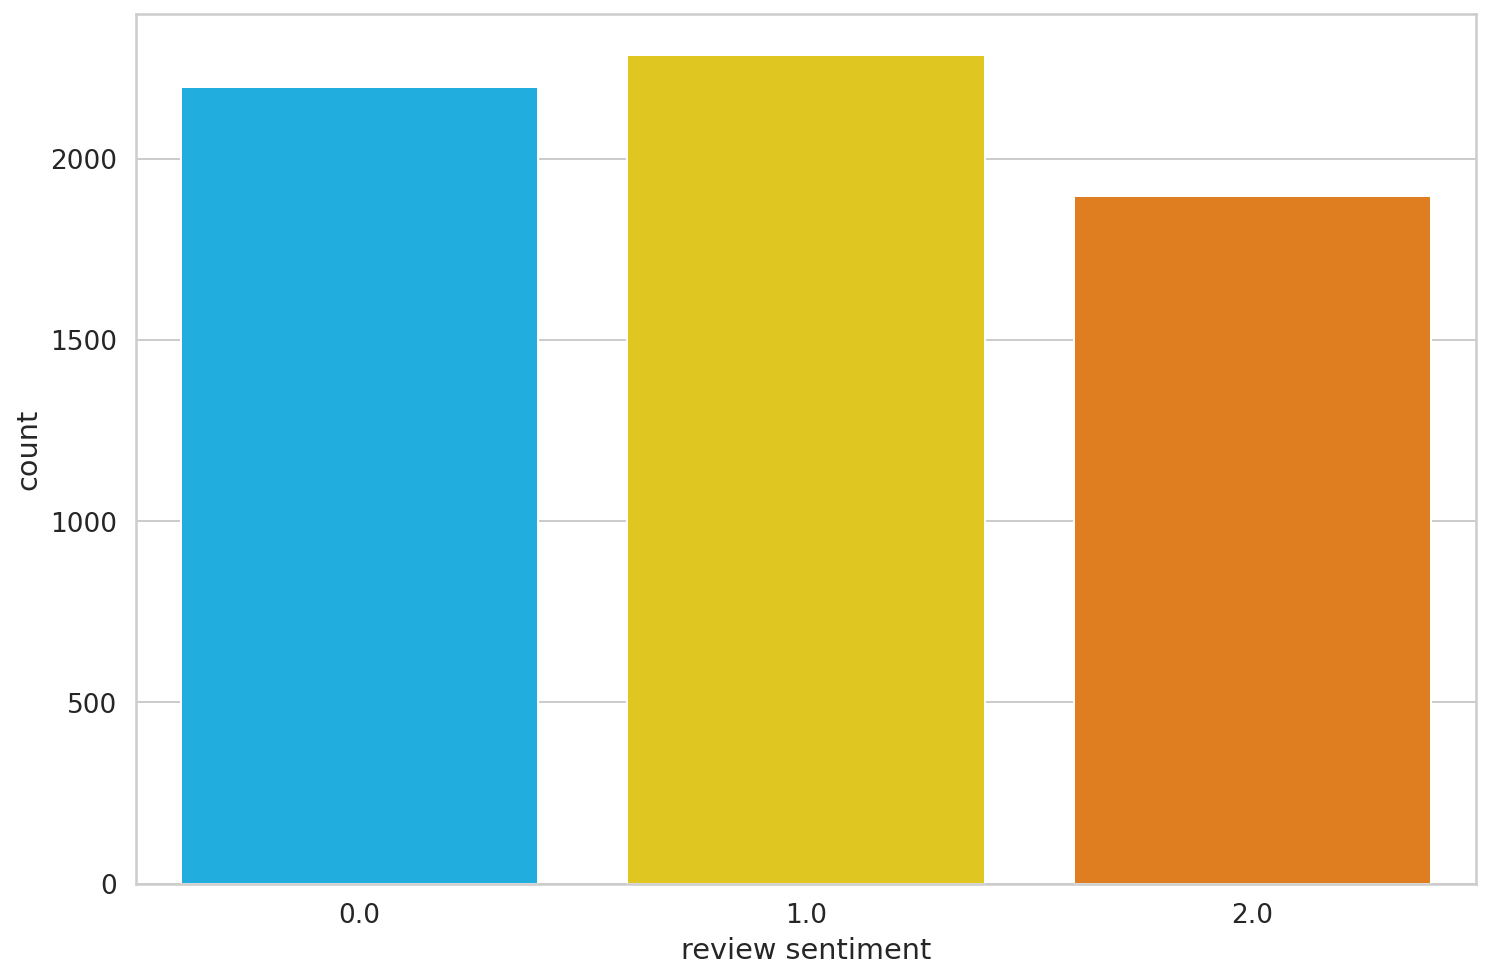

In [33]:
ax = sns.countplot(df.labels)
plt.xlabel('review sentiment')

### Split text and explode new

In [83]:
def split_text(r):
    out = []
    sents = sent_detector.tokenize(r)
    sents = [' '.join(tokenizer.tokenize(s)) for s in sents if len(s)>80]
    return sents

def apply_split_text(df):
    df["text_split"] = df["text"].apply(split_text)
    df.text_split.replace([], np.nan, inplace=True)
    df.dropna(subset=['text_split'], inplace=True)
    # Cancel all text_split == 0
    df.drop(df[df.text_split.map(len) == 0].index, inplace=True)
    return df

In [84]:
oil = apply_split_text(oil)
gas = apply_split_text(gas)
coal = apply_split_text(coal)
df = apply_split_text(df)

In [85]:
df = df.explode('text_split')
gas = gas.explode('text_split')
coal = coal.explode('text_split')
oil = oil.explode('text_split')

In [86]:
df.shape

(39175, 19)

In [89]:
df = df[["text_split", "labels", "text", "date"]]
gas = gas[["text_split", "labels", "text", "date"]]
oil = oil[["text_split", "labels", "text", "date"]]
coal = coal[["text_split", "labels", "text", "date"]]

In [91]:
df.to_csv(os.path.join(DATA_DIR, "labeled_split_sents_energy_1960_1990.csv"))
gas.to_csv(os.path.join(DATA_DIR, "labeled_split_sents_gas_1960_1990.csv"))
coal.to_csv(os.path.join(DATA_DIR, "labeled_split_sents_coal_1960_1990.csv"))
oil.to_csv(os.path.join(DATA_DIR, "labeled_split_sents_oil_1960_1990.csv"))